In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os.path

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import r2_score

In [2]:
images = pd.read_csv('./_annotations.csv')

In [3]:
images

,Unnamed: 0,Filepath,Weight
0,0,./20220430_172126_jpg.rf.3fafe29809654fd50b310...,136
1,1,./20220430_172126_jpg.rf.500efe03a5dfe328ca4ed...,136
2,2,./20220430_172126_jpg.rf.64d7d68c2db9ef8784de1...,136
3,3,./20220430_172126_jpg.rf.8ba840693486aa164606d...,136
4,4,./20220430_172126_jpg.rf.9376bc1137e185e64bb01...,136
...,...,...,...
93,93,./20220430_172634_jpg.rf.a873937c1c664a4940c19...,161
94,94,./20220430_172634_jpg.rf.b24154405b5441b1d7307...,161
95,95,./20220430_172634_jpg.rf.ba8e2086d1c9720d5637a...,161
96,96,./20220430_172634_jpg.rf.cbc9226afd4fedd195ed7...,161


In [4]:
images = images[['Filepath','Weight']]
images.tail()

,Filepath,Weight
93,./20220430_172634_jpg.rf.a873937c1c664a4940c19...,161
94,./20220430_172634_jpg.rf.b24154405b5441b1d7307...,161
95,./20220430_172634_jpg.rf.ba8e2086d1c9720d5637a...,161
96,./20220430_172634_jpg.rf.cbc9226afd4fedd195ed7...,161
97,./20220430_172634_jpg.rf.f8765c163c666ffaa9cd1...,161


In [5]:
train_df, test_df = train_test_split(images, train_size=0.7, shuffle=True, random_state=1)

In [6]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [7]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Weight',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)
val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Weight',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Weight',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=False
)

Found 55 validated image filenames.
Found 13 validated image filenames.
Found 30 validated image filenames.


In [12]:
inputs = tf.keras.Input(shape=(120, 120, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [13]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 59, 59, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 57, 57, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d_2   (None, 32)               0   

In [25]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mse'
)

In [26]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=200,
    # callbacks=[
    #     tf.keras.callbacks.EarlyStopping(
    #         monitor='val_loss',
    #         patience=5,
    #         restore_best_weights=True
    #     )
    # ]
)

Epoch 1/200
2/2 [==============================] - 1s 298ms/step - loss: 2610.9995 - val_loss: 611.8718
Epoch 2/200
2/2 [==============================] - 0s 165ms/step - loss: 1211.4323 - val_loss: 1531.4377
Epoch 3/200
2/2 [==============================] - 0s 180ms/step - loss: 744.3281 - val_loss: 497.5287
Epoch 4/200
2/2 [==============================] - 0s 143ms/step - loss: 773.8289 - val_loss: 1333.6616
Epoch 5/200
2/2 [==============================] - 0s 160ms/step - loss: 978.5619 - val_loss: 247.5989
Epoch 6/200
2/2 [==============================] - 0s 160ms/step - loss: 183.3886 - val_loss: 566.5135
Epoch 7/200
2/2 [==============================] - 0s 153ms/step - loss: 699.0227 - val_loss: 350.3643
Epoch 8/200
2/2 [==============================] - 0s 135ms/step - loss: 334.2834 - val_loss: 251.2247
Epoch 9/200
2/2 [==============================] - 0s 142ms/step - loss: 331.9361 - val_loss: 520.4112
Epoch 10/200
2/2 [==============================] - 0s 176ms/step - l

In [21]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  # plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

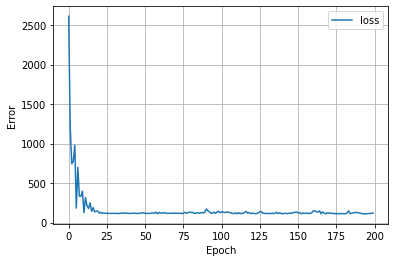

In [27]:
plot_loss(history)

In [28]:
predicted_weight = np.squeeze(model.predict(test_images))
true_ages = test_images.labels

rmse = np.sqrt(model.evaluate(test_images, verbose=0))
print("     Test RMSE: {:.5f}".format(rmse))

r2 = r2_score(true_ages, predicted_weight)
print("Test R^2 Score: {:.5f}".format(r2))

     Test RMSE: 8.50053
Test R^2 Score: -0.32353


In [29]:
null_rmse = np.sqrt(np.sum((true_ages - np.mean(true_ages))**2) / len(true_ages))
print("Null/Baseline Model Test RMSE: {:.5f}".format(null_rmse))

Null/Baseline Model Test RMSE: 7.38888
